In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
# unch object
# działa jak słownik, w którym klucze można traktować jak atrybuty
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 'data' (atrybut) oznacza dane wejściowe
data.data.shape
# 569 sampli, 30 ficzerów

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split


# podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Tworzenie modelu

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Trenowanie modelu
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Ewaluacja modelu - zwraca funkcję loss i accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3103 - loss: 0.9866 - val_accuracy: 0.3670 - val_loss: 0.9320
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4098 - loss: 0.9349 - val_accuracy: 0.4681 - val_loss: 0.8475
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5057 - loss: 0.8060 - val_accuracy: 0.5160 - val_loss: 0.7729
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5677 - loss: 0.7709 - val_accuracy: 0.5957 - val_loss: 0.7092
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6474 - loss: 0.6671 - val_accuracy: 0.6649 - val_loss: 0.6547
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6305 - loss: 0.6473 - val_accuracy: 0.7128 - val_loss: 0.6065
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6880 - loss: 0.6045 - val_accuracy: 0.7287 - val_loss: 0.5654
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7232 - loss: 0.5686 - val_accuracy: 0.7553 - 

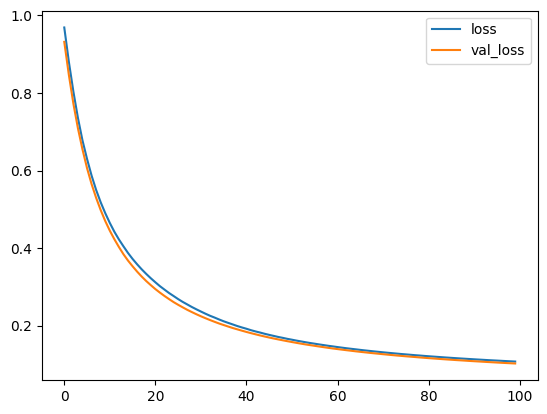

In [14]:
# Wykres zwracany przez funkcję model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

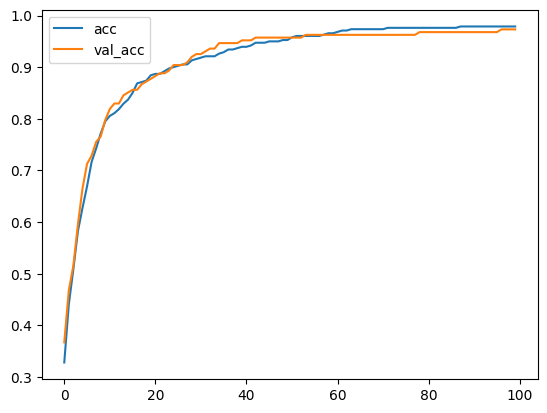

In [15]:
# Wykres z accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Predykcja
P = model.predict(X_test)
print(P)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[9.97335494e-01]
 [2.96459228e-01]
 [9.97674346e-01]
 [9.25170779e-01]
 [9.50079143e-01]
 [1.04177743e-01]
 [8.91637355e-02]
 [9.93481696e-01]
 [9.91641343e-01]
 [2.41173774e-01]
 [8.94691885e-01]
 [1.36564687e-01]
 [9.96627569e-01]
 [7.35045969e-01]
 [8.73648822e-01]
 [9.77394640e-01]
 [9.96621132e-01]
 [9.66355860e-01]
 [3.94951195e-01]
 [9.83069897e-01]
 [6.36993267e-04]
 [7.87417710e-01]
 [9.46951449e-01]
 [2.47921025e-06]
 [9.38785195e-01]
 [9.91193354e-01]
 [9.34190154e-01]
 [1.15978082e-06]
 [4.50115174e-01]
 [9.58409190e-01]
 [7.62249827e-01]
 [5.15155960e-03]
 [9.90950704e-01]
 [5.67712821e-04]
 [6.31182551e-01]
 [9.99388278e-01]
 [8.60184610e-01]
 [8.64998341e-01]
 [6.46086555e-05]
 [2.56842104e-05]
 [5.50023556e-01]
 [7.59410113e-02]
 [9.53337371e-01]
 [9.89643335e-01]
 [1.65522401e-03]
 [5.64177819e-02]
 [9.90415394e-01]
 [8.61209273e-01]
 [9.22152679e-03]
 [9.98142123e-01]
 [9.89713013e-01]
 [9.95813787e-01]
 [9.89716768e-01]
 [1.0633

In [17]:
# Zaokrąglij, aby uzyskać rzeczywiste przewidywania
# Spłaszczenie ponieważ targety mają rozmiar (N,), podczas gdy prognozy mają rozmiar (N,1).
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]


In [18]:
# Oblicz accuracy, porównaj ją z wynikiem funkcji evaluate()
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1054 
Evaluate output: [0.10309488326311111, 0.9734042286872864]


In [20]:
# Zapisanie modelu
model.save('linearclassifier.keras')

In [21]:
# Wczytanie modelu
model = tf.keras.models.load_model('linearclassifier.keras')
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1054  


[0.10309488326311111, 0.9734042286872864]

In [22]:
from google.colab import files
files.download('linearclassifier.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>